In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Auto_Insurance_Claims_amount.csv')
data

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,US,IA,Iowa,825.629780,Yes,Basic,Bachelor,1/25/11,Employed,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,US,IA,Iowa,538.089864,Yes,Basic,College,2/24/11,Employed,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,US,NE,Nebraska,721.610031,No,Premium,Master,1/18/11,Unemployed,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,US,IA,Iowa,2412.750402,Yes,Basic,Bachelor,1/26/11,Medical Leave,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,US,IA,Iowa,738.817808,No,Extended,College,2/17/11,Employed,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize


# Data Exploration

In [3]:
data.shape

(9134, 26)

In [4]:
data.keys()

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [6]:
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

As we can see their is no null value in this data.

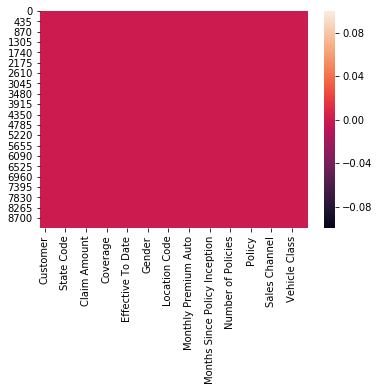

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

As we can see there are lots of object data types in the data sets we have to change the data sets object from integer.

In [9]:
data.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
data.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


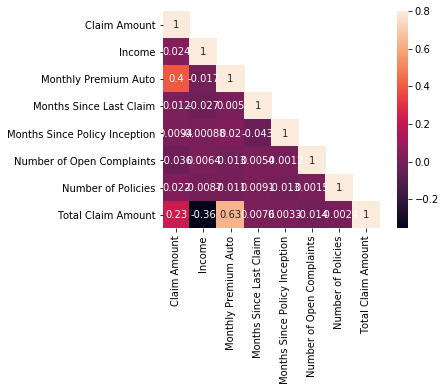

In [11]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

In [12]:
#changing categorical value to numerical value of train data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in data.columns:
    data[col]=le.fit_transform(data[col])
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,0,1,1,975,0,0,0,47,1,...,5,0,0,0,2,0,0,2941,5,1
1,5946,0,3,3,4659,0,1,0,24,4,...,42,0,7,1,5,3,0,4880,0,1
2,96,0,4,4,6900,0,2,0,41,1,...,38,0,1,1,5,0,0,3897,5,1
3,8016,0,2,2,5140,0,0,0,12,4,...,65,0,6,0,1,0,2,3764,3,1
4,2488,0,1,1,1058,0,0,0,52,1,...,44,0,0,1,3,0,0,1138,0,1


In [13]:
#cross check of label encoder
data.dtypes

Customer                         int32
Country                          int32
State Code                       int32
State                            int32
Claim Amount                     int32
Response                         int32
Coverage                         int32
Education                        int32
Effective To Date                int32
EmploymentStatus                 int32
Gender                           int32
Income                           int32
Location Code                    int32
Marital Status                   int32
Monthly Premium Auto             int32
Months Since Last Claim          int32
Months Since Policy Inception    int32
Number of Open Complaints        int32
Number of Policies               int32
Policy Type                      int32
Policy                           int32
Claim Reason                     int32
Sales Channel                    int32
Total Claim Amount               int32
Vehicle Class                    int32
Vehicle Size             

In [14]:
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,0,1,1,975,0,0,0,47,1,...,5,0,0,0,2,0,0,2941,5,1
1,5946,0,3,3,4659,0,1,0,24,4,...,42,0,7,1,5,3,0,4880,0,1
2,96,0,4,4,6900,0,2,0,41,1,...,38,0,1,1,5,0,0,3897,5,1
3,8016,0,2,2,5140,0,0,0,12,4,...,65,0,6,0,1,0,2,3764,3,1
4,2488,0,1,1,1058,0,0,0,52,1,...,44,0,0,1,3,0,0,1138,0,1


# Feature Selection

In [15]:
data['Gender']

0       0
1       0
2       0
3       1
4       1
5       0
6       0
7       1
8       1
9       0
10      1
11      0
12      1
13      1
14      1
15      0
16      1
17      1
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
9104    1
9105    1
9106    1
9107    1
9108    0
9109    1
9110    0
9111    1
9112    0
9113    0
9114    0
9115    0
9116    0
9117    0
9118    1
9119    1
9120    0
9121    0
9122    0
9123    0
9124    1
9125    1
9126    1
9127    1
9128    0
9129    1
9130    0
9131    1
9132    1
9133    1
Name: Gender, Length: 9134, dtype: int32

In [16]:
data.shape

(9134, 26)

In [17]:
data.drop(["State Code"],axis=1,inplace=True)

In [18]:
data.drop(["State"],axis=1,inplace=True)

In [19]:
data.drop(["Gender"],axis=1,inplace=True)

In [20]:
data.shape

(9134, 23)

# Univariate Analysis

In [21]:
data.columns

Index(['Customer', 'Country', 'Claim Amount', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Claim Reason', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

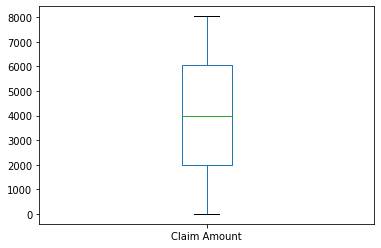

In [22]:
data['Claim Amount'].plot.box()

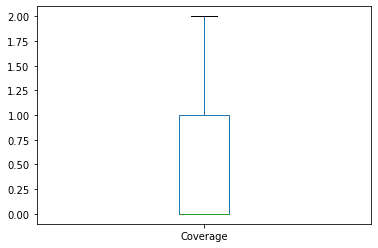

In [23]:
data['Coverage'].plot.box()

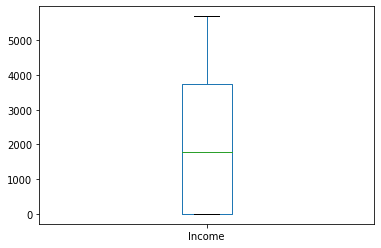

In [24]:
data['Income'].plot.box()

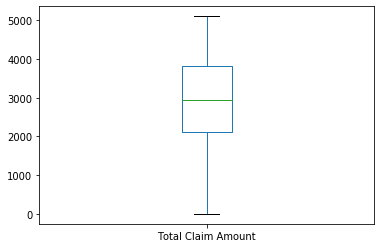

In [25]:
data['Total Claim Amount'].plot.box()

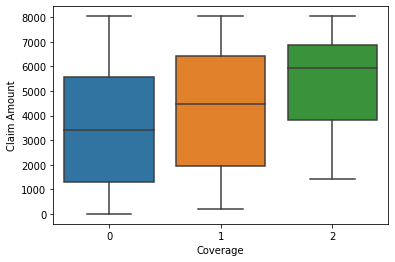

In [26]:
#checking outliers against target variable
sns.boxplot('Coverage', 'Claim Amount', data = data)

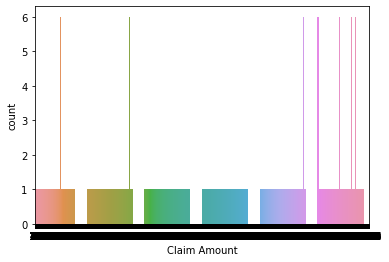

In [27]:
#plotting the count ofthe target data
sns.countplot(x='Claim Amount',data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12784D50>,
      dtype=object)

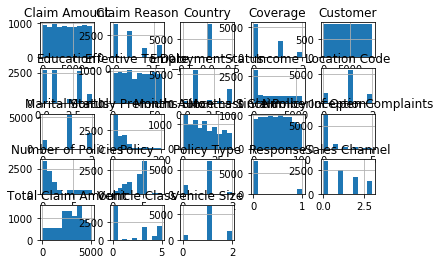

In [28]:
data.hist()

In [31]:
data.shape

(9134, 23)

In [32]:
# modeling utilities
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [33]:
#choosing x and y
x=data.drop('Claim Amount',axis=1)
y=data['Claim Amount']

In [34]:
x.shape,y.shape

((9134, 22), (9134,))

# Standard Scaler

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [36]:
#splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7124, 22)
(2010, 22)
(7124,)
(2010,)


In [38]:
dtr = DecisionTreeRegressor()
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:
dtr.score(x,y)

1.0

# Grid Search CV

In [40]:
param_grid = {"criterion": ["mse", "mae"]}

In [41]:
dt= DecisionTreeRegressor()

In [42]:
grid_cv_dtr = GridSearchCV(dt, param_grid, cv=5)

In [43]:
grid_cv_dtr.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'criterion': ['mse', 'mae']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.9473593570042189
Best Hyperparameters::
{'criterion': 'mae'}


In [45]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, x, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, x, y, cv=10,scoring='neg_mean_squared_error')

In [46]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::0.9457109862853434
MSE::-300011.3667315772


In [47]:
grid_cv_dtr.score(x,y)

1.0

In [48]:
from sklearn.externals import joblib

In [49]:
joblib.dump(grid_cv_dtr, "Project31_Auto Insurance.pkl")

['Project31_Auto Insurance.pkl']

In [50]:
x= joblib.load("Project31_Auto Insurance.pkl")

In [51]:
x.predict(x_test)

array([2175., 3705., 1870., ..., 6016., 3100., 4823.])